# Assignment 1 Question 7 

In [1]:
# Mazen Al Rifai
# 20198044
# MMA
# 2021W
# MMA 869
# 16 August 2020


# Answer to Question [2], Part [a]

import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport

import imblearn
from imblearn.over_sampling import SMOTE


import matplotlib as mpl  
import matplotlib.pyplot as plt
#%matplotlib inline Used to display charts within notebook
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

import sklearn
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

import scipy


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Load dataset
df = pd.read_csv("OJ.csv")


TypeError: run_line_magic() missing 1 required positional argument: 'line'

In [2]:
#Explore data
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()
pd.isna(df)
df.isnull().sum()
df.corr()

['Unnamed: 0',
 'Purchase',
 'WeekofPurchase',
 'StoreID',
 'PriceCH',
 'PriceMM',
 'DiscCH',
 'DiscMM',
 'SpecialCH',
 'SpecialMM',
 'LoyalCH',
 'SalePriceMM',
 'SalePriceCH',
 'PriceDiff',
 'Store7',
 'PctDiscMM',
 'PctDiscCH',
 'ListPriceDiff',
 'STORE']

(1070, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM     1070 non-null   float64
 12  SalePriceCH     1070 non-null   float64
 13  PriceDiff       1070 non-null   float64
 14  Store7          1070 non-null   object 
 15  PctDiscMM       1070 non-null   float64
 16  PctDiscCH       1070 non-null   float64
 17  ListPriceDiff   1070 non-null   f

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1070.0,535.500000,309.026698,1.000000,268.250000,535.50,802.750000,1070.000000
WeekofPurchase,1070.0,254.381308,15.558286,227.000000,240.000000,257.00,268.000000,278.000000
StoreID,1070.0,3.959813,2.308984,1.000000,2.000000,3.00,7.000000,7.000000
PriceCH,1070.0,1.867421,0.101970,1.690000,1.790000,1.86,1.990000,2.090000
PriceMM,1070.0,2.085411,0.134386,1.690000,1.990000,2.09,2.180000,2.290000
DiscCH,1070.0,0.051860,0.117474,0.000000,0.000000,0.00,0.000000,0.500000
DiscMM,1070.0,0.123364,0.213834,0.000000,0.000000,0.00,0.230000,0.800000
SpecialCH,1070.0,0.147664,0.354932,0.000000,0.000000,0.00,0.000000,1.000000
SpecialMM,1070.0,0.161682,0.368331,0.000000,0.000000,0.00,0.000000,1.000000
LoyalCH,1070.0,0.565782,0.307843,0.000011,0.325257,0.60,0.850873,0.999947


,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1065,1066,CH,252,7,1.86,2.09,0.1,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,1067,CH,256,7,1.86,2.18,0.0,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,1068,MM,257,7,1.86,2.18,0.0,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,1069,CH,261,7,1.86,2.13,0.0,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0
1069,1070,CH,270,1,1.86,2.18,0.0,0.00,0,0,0.671172,2.18,1.86,0.32,No,0.000000,0.000000,0.32,1


,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1066,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1067,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1068,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Unnamed: 0        0
Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

,Unnamed: 0,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
Unnamed: 0,1.000000,-0.071130,-0.052550,-0.144414,-0.081547,0.012560,0.036619,0.058063,0.037842,-0.265390,-0.074354,-0.112993,-0.009529,0.039345,0.015216,0.035031,-0.167845
WeekofPurchase,-0.071130,1.000000,0.096046,0.704324,0.576872,0.365722,0.242334,0.107866,0.070688,0.192897,0.101719,0.201256,-0.011610,0.223533,0.355047,0.053038,-0.053652
StoreID,-0.052550,0.096046,1.000000,0.020815,0.093344,0.333182,0.010619,0.379360,-0.171641,0.237333,0.040655,-0.258172,0.174144,0.014302,0.334715,0.096913,-0.531597
PriceCH,-0.144414,0.704324,0.020815,1.000000,0.616402,0.151900,0.116310,-0.099056,-0.018026,0.077793,0.229383,0.586716,-0.096335,0.099157,0.134601,-0.177935,0.399570
PriceMM,-0.081547,0.576872,0.093344,0.616402,1.000000,0.065206,-0.001246,-0.031281,-0.068340,0.115570,0.532859,0.384941,0.292594,-0.021747,0.059964,0.665187,0.106612
DiscCH,0.012560,0.365722,0.333182,0.151900,0.065206,1.000000,0.018035,0.534775,-0.046952,0.139400,0.019416,-0.711274,0.393615,0.014718,0.999022,-0.062551,-0.243812
DiscMM,0.036619,0.242334,0.010619,0.116310,-0.001246,0.018035,1.000000,0.156636,0.465792,-0.020292,-0.846868,0.067940,-0.823908,0.998793,0.018521,-0.111848,-0.125917
SpecialCH,0.058063,0.107866,0.379360,-0.099056,-0.031281,0.534775,0.156636,1.000000,-0.154170,0.137058,-0.149182,-0.508586,0.129713,0.160750,0.549015,0.054838,-0.321847
SpecialMM,0.037842,0.070688,-0.171641,-0.018026,-0.068340,-0.046952,0.465792,-0.154170,1.000000,-0.088246,-0.430499,0.025648,-0.414135,0.466546,-0.051138,-0.068311,-0.083691
LoyalCH,-0.265390,0.192897,0.237333,0.077793,0.115570,0.139400,-0.020292,0.137058,-0.088246,1.000000,0.078631,-0.058887,0.104261,-0.022460,0.138684,0.070659,-0.103126


In [ ]:
# Generate profile report using pandas_profiling
ProfileReport(df)

In [3]:
#Creating target variabled Purchase_Ch

df['Purchase_CH'] = np.where(df['Purchase']=="CH",1, 0)


In [4]:
#Convert Store7 to a binary variable
df['Store7'] = np.where(df['Store7']=="Yes",1, 0)


<AxesSubplot:xlabel='StoreID', ylabel='count'>

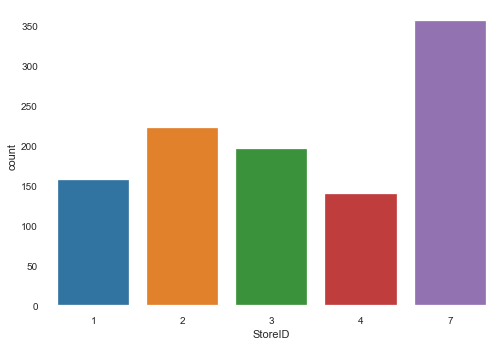

In [5]:
#Check distribution for StoreID
sns.countplot(x="StoreID",data=df)

In [6]:
#Dropping highly correlated features
df2=df.drop(["WeekofPurchase","PriceDiff","DiscCH","DiscMM","PctDiscCH","PctDiscMM","STORE","Store7","ListPriceDiff","Purchase","Unnamed: 0"],axis=1)
            


In [ ]:
#Check for correlation again using pandas_profiling
ProfileReport(df2)

In [7]:
# Create dummy variables for  StoreID categorical variable
y = pd.get_dummies(df2.StoreID, prefix='StoreID',drop_first=True)
df3 = pd.concat([df2, y], axis=1)


In [8]:
# Answer to Question [2], Part [b]

In [9]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

# For X variable, the target variable ("Purchase_CH") was dropped since it will be predicted using the model.
X = df3.drop(["Purchase_CH"], axis=1)

#For y variable, all other variabes are dropped. This variable will be used for assessing the model peformance using the AUC metric
y = df3["Purchase_CH"]

# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Exploring training dataset before building the model
X.info()
X.shape
X.head()

X_train.info()
X_train.shape
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreID      1070 non-null   int64  
 1   PriceCH      1070 non-null   float64
 2   PriceMM      1070 non-null   float64
 3   SpecialCH    1070 non-null   int64  
 4   SpecialMM    1070 non-null   int64  
 5   LoyalCH      1070 non-null   float64
 6   SalePriceMM  1070 non-null   float64
 7   SalePriceCH  1070 non-null   float64
 8   StoreID_2    1070 non-null   uint8  
 9   StoreID_3    1070 non-null   uint8  
 10  StoreID_4    1070 non-null   uint8  
 11  StoreID_7    1070 non-null   uint8  
dtypes: float64(5), int64(3), uint8(4)
memory usage: 71.2 KB


(1070, 12)

,StoreID,PriceCH,PriceMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,StoreID_2,StoreID_3,StoreID_4,StoreID_7
0,1,1.75,1.99,0,0,0.500000,1.99,1.75,0,0,0,0
1,1,1.75,1.99,0,1,0.600000,1.69,1.75,0,0,0,0
2,1,1.86,2.09,0,0,0.680000,2.09,1.69,0,0,0,0
3,1,1.69,1.69,0,0,0.400000,1.69,1.69,0,0,0,0
4,7,1.69,1.69,0,0,0.956535,1.69,1.69,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 351 to 860
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreID      856 non-null    int64  
 1   PriceCH      856 non-null    float64
 2   PriceMM      856 non-null    float64
 3   SpecialCH    856 non-null    int64  
 4   SpecialMM    856 non-null    int64  
 5   LoyalCH      856 non-null    float64
 6   SalePriceMM  856 non-null    float64
 7   SalePriceCH  856 non-null    float64
 8   StoreID_2    856 non-null    uint8  
 9   StoreID_3    856 non-null    uint8  
 10  StoreID_4    856 non-null    uint8  
 11  StoreID_7    856 non-null    uint8  
dtypes: float64(5), int64(3), uint8(4)
memory usage: 63.5 KB


(856, 12)

,StoreID,PriceCH,PriceMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,StoreID_2,StoreID_3,StoreID_4,StoreID_7
351,7,2.06,2.13,0,0,0.982408,2.13,2.06,0,0,0,1
530,2,1.75,1.99,0,0,0.680000,1.99,1.75,1,0,0,0
896,7,1.86,2.18,0,0,0.868928,2.18,1.86,0,0,0,1
947,3,1.99,2.09,0,0,0.011649,2.09,1.99,0,1,0,0
936,2,1.69,1.69,1,0,0.135607,1.69,1.39,1,0,0,0


In [11]:
# Answer to Question [2], Part [c]

In [12]:
# Decision Tree classifier without hyperparameter tuning 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4)

In [13]:
#Decision Tree classifier with hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

base_dtc = DecisionTreeClassifier(class_weight=None, random_state=42)
parameters_grid = {'criterion': ('gini', 'entropy'),
                  'max_depth': [1,2, 3, 4, 5, 6,7]}
DTC_grid = GridSearchCV(base_dtc, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)
%time DTC_grid.fit(X_train, y_train)

DTC_grid.best_params_ # printing out best parameters


Wall time: 1.66 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             return_train_score=True, scoring='f1')

{'criterion': 'entropy', 'max_depth': 5}

In [14]:
#Random Forest classifier without hyperparameter tuning 

from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)


RandomForestClassifier()

In [15]:
#Random Forest classifier with hyperparameter tuning 

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

base_rfc = RandomForestClassifier(class_weight=None, random_state=42)
parameters_grid = {'criterion': ('gini', 'entropy'),
                  'max_depth': [2, 3, 4, 5, 6],
                  'max_leaf_nodes': [None, 5, 10, 50, 100],
                  'min_impurity_decrease': [0, 0.1, 0.2],
                  'min_samples_leaf': [1, 10, 50],
                  'min_samples_split': [2, 10, 50]}
RFC_grid = GridSearchCV(base_rfc, param_grid=parameters_grid, scoring="f1", n_jobs=3, cv=5, return_train_score=True)
%time RFC_grid.fit(X_train, y_train)
RFC_grid.best_params_ # printing out best parameters


Wall time: 7min 27s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=3,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [None, 5, 10, 50, 100],
                         'min_impurity_decrease': [0, 0.1, 0.2],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 10, 50]},
             return_train_score=True, scoring='f1')

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [16]:
#Logistic Regression classifier without hyperparameter tuning 

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=50000)
log_reg.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=50000)

In [17]:
#Logistic Regression classifier with hyperparameter tuning 

parameters_grid = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga']}

# Create grid search object

LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=2, scoring='roc_auc')

# Fit on data

%time LogReg_grid.fit(X_train, y_train)

LogReg_grid.best_params_ # printing out best parameters


Wall time: 2.92 s


C:\Users\rifai\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='roc_auc')

{'C': 10,
 'dual': False,
 'fit_intercept': True,
 'penalty': 'l1',
 'solver': 'saga'}

# Estimate Model Performance for fine tuned models

[[ 55  29]
 [ 13 117]]


(55, 29, 13, 117)

<AxesSubplot:>

AUC Score = 0.777

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        84
           1       0.80      0.90      0.85       130

    accuracy                           0.80       214
   macro avg       0.81      0.78      0.79       214
weighted avg       0.80      0.80      0.80       214



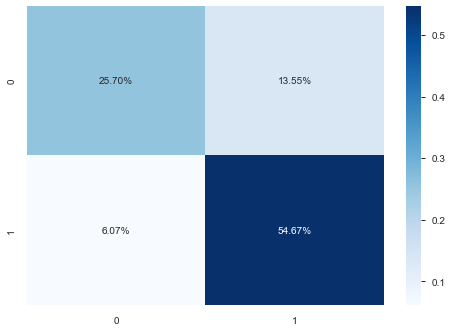

In [18]:
# Predicting performance of hypertuned DTC model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

pred_val = DTC_grid.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

[[ 60  24]
 [ 14 116]]


(60, 24, 14, 116)

<AxesSubplot:>

AUC Score = 0.803

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        84
           1       0.83      0.89      0.86       130

    accuracy                           0.82       214
   macro avg       0.82      0.80      0.81       214
weighted avg       0.82      0.82      0.82       214



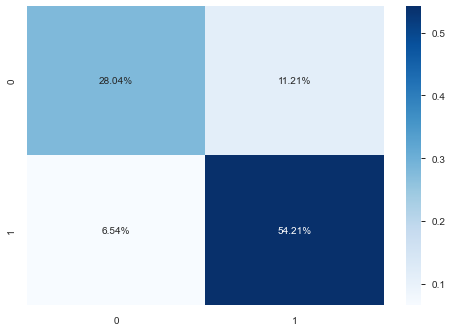

In [19]:
# Predicting performance of hypertuned RFC model

pred_val = RFC_grid.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

[[ 59  25]
 [ 12 118]]


(59, 25, 12, 118)

<AxesSubplot:>

AUC Score = 0.805

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        84
           1       0.83      0.91      0.86       130

    accuracy                           0.83       214
   macro avg       0.83      0.81      0.81       214
weighted avg       0.83      0.83      0.82       214



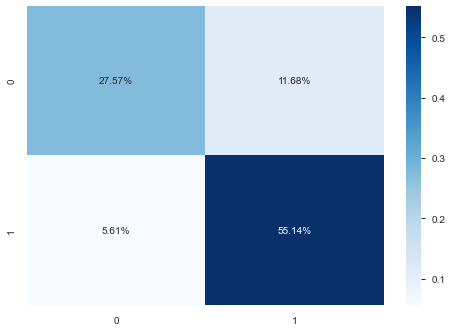

In [20]:
# Predicting performance of hypertuned Logistic Regression model

pred_val = LogReg_grid.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))